### Predict Customer Churn Using Python & Machine Learning

In [1]:
#Import the library
import pandas as pd    #Data manupulation
import numpy as np     #linear algebra
import sklearn         #Statistics
import matplotlib.pyplot as plt     # Visualisation
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Load the data 
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Analyze The Data

In [3]:
data.shape # Getting number of rows & Columns in the data set

(7043, 21)

In [4]:
# Showing all the columns names in the data set
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
# Checking for missing data
data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#Let's see the missing data interms of 0 or 1
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

+ As, We can see there is no missing data here

In [7]:
# show some statistics on data
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Next, get the number of customers that churned and were retained (did not churn).
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

##### About 5,174 customers were retained (did not churn) and 1,869 customers churned. Let’s show this count visually using a bar plot.

#### Visualization

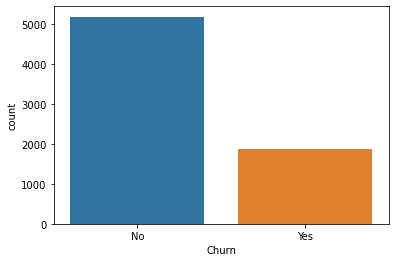

In [9]:
#Visualize the count of customer churn
sns.countplot(data['Churn'])

###### What percentage of customers are leaving ?

In [10]:
# Now I want to know what number of percentage are leaving
retained = data[data.Churn == 'No']
churned = data[data.Churn == 'Yes']
num_retained = retained.shape[0]
num_churned = churned.shape[0]

In [11]:
#Print the percentage of customers that left
print( num_retained / (num_retained + num_churned) * 100 , "% of customers stayed with the company.")

73.4630129206304 % of customers stayed with the company.


In [12]:
#Print the percentage of customers that stayed
print( num_churned / (num_retained + num_churned) * 100,"% of customers left the company.")

26.536987079369588 % of customers left the company.


+ As here, 73.46% of the customer stayed or retained and 26.53% of the customers churned.
+ This is important information for when I try to evaluate my model to predict customer churn, because it means that just by always guessing a random customer to have been retained from the data set, I have a 73.46% chance of guessing correctly.
+ So, I want the model’s accuracy to classify/predict if a customer will churn to be higher than that percentage

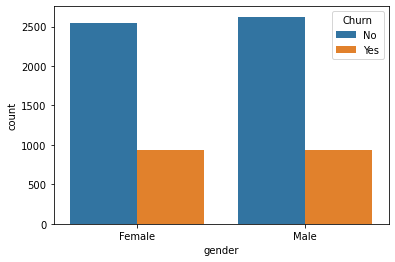

In [13]:
#Visualize the churn count for both Males and Females
sns.countplot(x = 'gender', hue = 'Churn', data = data)

#### Data Processing & Cleaning

In [14]:
#Remove the unnecessary column customerID
cleaned_data = data = data.drop('customerID', axis=1)

+ We can see that the customerID column will not add any more value to the model or the analysis seeing as how it’s just an ID for the customer

In [15]:
data.head() # checking the new data set after removing the customerID

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
# checking the rows and columns of new dataset
cleaned_data.shape

(7043, 20)

+ As we can see there is 7043 rows and 20 column which is one column less than the original data set.

In [17]:
# Now converting all the non numerical/categorical column to numerical data types

for column in cleaned_data.columns:
    if cleaned_data[column].dtype == np.number:
        continue
    cleaned_data[column] = LabelEncoder().fit_transform(cleaned_data[column])

In [18]:
#Check the new data set data types
cleaned_data.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

###### let’s take a look at the data set’s data types, and show a few rows with the numerical data.

In [19]:
cleaned_data.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

+ We can see that all numeric datatypes from the new dataset

In [20]:
# Check first five rows of dataset
cleaned_data.head()  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


+ It worked and all the datatypes are numerical values
+ I want to scale the data to be values between 0 and 1 inclusively .

In [21]:
#Scale the cleaned data
X = cleaned_data.drop('Churn', axis = 1) 
y = cleaned_data['Churn']

In [22]:
#Standardizing/scaling the features
X = StandardScaler().fit_transform(X)

### Training and Testing

#### Now that the data has been scaled, I need to split the data into training and testing data sets.

In [23]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create The Model

In [24]:
#Create the model
model = LogisticRegression()

In [25]:
#Train the model
model.fit(x_train, y_train)

LogisticRegression()

### Evaluate The Model

+ To evaluate the logistic regression model, I will print the predictions and look at the test statistics like precision, recall and the f-1 score.

In [26]:
predictions = model.predict(x_test)
#printing the predictions
print(predictions)

[1 0 0 ... 0 0 0]


In [27]:
#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



##### We can see that the recall of the model is about 91% meaning the model correctly identified about 91% of the customers that were retained and missed about 9%.
##### The precision of the model was about 85% and the f1-score was about 88%. 
##### The accuracy of the model was about 82% which is better than the 73.46% that I could’ve done just by guessing a customer would always stay with the company.